# WeatherPy

This Jupyter notebook uses the OpenWeatherMap API to retrieve weather data for a set of at least 500 randomly-generated
cities whose latitude and longitude were obtained using the citypy library.  The code to generate the random
list of 1500 sets of coordinates and to get the nearest city to a particular latitude and longitude was provided.
Starting from 1500 combinations seems to yield between 500 and 600 cities.  The city data is saved in a csv file
and used in a second Jupyter notebook later. All output is saved in the output_data folder.

The OpenWeatherMap API is used to get weather data for each of the cities.
The code then generates two sets of scatter plots.  The first set shows the relationship between four weather
variables and latitude, globally.  Four plots are displayed on the terminal and saved as .png files.  

•	Latitude vs. Temperature
•	Latitude vs. Humidity
•	Latitude vs. Cloudiness
•	Latitude vs. Wind Speed

The second set of plots calculates linear regressions for these same four weather variables for the northern 
hemisphere, and for the southern hemisphers, and creates eight scatter plots showing the linear
regression line and the equation for the line.  After each set of plots for the northern and southern hemisphers
for a particular weather variable, this notebook contains some analysis about the relationship
between latitude and that weather variable.  Each of the eight plots is saved as a "png" file.

The second sets of plots were generated individually, using a single function to calculate the linear 
regression values and associated equation, and then another group of plots was created using a 
second function to configure and plot the data.  That function itself calls the linear regression function.
While using the two functions makes it very efficient to draw the plots, the separate, repeated code for each
plot might make it more clear for the user what is happening (or might not).



## Generate Random Geographic Coordinates and a List of More than 500 Cities

In [1]:
# Dependencies and Setup

import string
from pathlib import Path
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

import requests
import time
from scipy.stats import linregress

# path for the api_keys file
import sys
sys.path.append("../")

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List Using the "citipy" Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities' names
cities = []

# Ranges of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
# Python "zip()" will combine two lists into one list of tuples
# We want at least 500 cities but need to account for duplicates
# or no city present in the initial set of lat/longs requested
# The random city generator code was provided in the stater code.

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print city count to confirm there are a sufficient number of cities

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the random cities list generated

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Save config information.
# Get temp in Celsius, per project requirements
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to display to create a log
print("-----------------------------")
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list to fetch weather data
# The default "start" value for enumerate() is zero, appropriate
# for iterating through an array.  The grouping of fifty code
# for printing was provided in the starter code.

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    # There is also a limit on requests per 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL for each city
    # if no mode is specified, the default returned is json
    city_url = query_url + city
    
    # Print the city, record, and set numbers to keep user informed
    # of progress as the data is being retrieved
    
    print(f"Processing Record {record_count} of Set {set_count} for city {city}")
    
    # increment the record count
    record_count += 1

    # Run an API request for the city
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather['coord']['lat'])
        city_lng = (city_weather['coord']['lon'])
        city_max_temp = (city_weather['main']["temp_max"])
        city_humidity = (city_weather['main']["humidity"])
        city_clouds = (city_weather['clouds']["all"])
        city_wind = (city_weather['wind']["speed"])
        city_country = (city_weather['sys']["country"])
        city_date = (city_weather['dt'])

        # Append the city information to the city_data list
        # Appending in this way will add
        # the information for this city as one entry
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error occurs, skip this city
    except:

        print("City not found.  Skipping it...")
        pass
              
# Indicate that data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


-----------------------------
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 for city bredasdorp
Processing Record 2 of Set 1 for city thinadhoo
Processing Record 3 of Set 1 for city alice springs
Processing Record 4 of Set 1 for city puerto natales
Processing Record 5 of Set 1 for city magalia
Processing Record 6 of Set 1 for city la ronge
Processing Record 7 of Set 1 for city pacific grove
Processing Record 8 of Set 1 for city reggane
Processing Record 9 of Set 1 for city itamaraca
Processing Record 10 of Set 1 for city grytviken
Processing Record 11 of Set 1 for city portland
Processing Record 12 of Set 1 for city najran
Processing Record 13 of Set 1 for city namtsy
Processing Record 14 of Set 1 for city waitangi
Processing Record 15 of Set 1 for city florida
Processing Record 16 of Set 1 for city yakeshi
Processing Record 17 of Set 1 for city anadyr
Processing Record 18 of Set 1 for city ribeira grande
Processing Record 19 of Set 1 for city

Processing Record 12 of Set 4 for city christchurch
Processing Record 13 of Set 4 for city hermanus
Processing Record 14 of Set 4 for city luderitz
Processing Record 15 of Set 4 for city canmore
Processing Record 16 of Set 4 for city lembar
City not found.  Skipping it...
Processing Record 17 of Set 4 for city tazacorte
Processing Record 18 of Set 4 for city barra de santo antonio
Processing Record 19 of Set 4 for city sechura
Processing Record 20 of Set 4 for city whittlesea
Processing Record 21 of Set 4 for city victoria
Processing Record 22 of Set 4 for city chegdomyn
Processing Record 23 of Set 4 for city sitia
Processing Record 24 of Set 4 for city avarua
Processing Record 25 of Set 4 for city olonkinbyen
Processing Record 26 of Set 4 for city ta`u
Processing Record 27 of Set 4 for city cabedelo
Processing Record 28 of Set 4 for city sisimiut
Processing Record 29 of Set 4 for city al bawiti
Processing Record 30 of Set 4 for city san sebastian de la gomera
Processing Record 31 of S

Processing Record 24 of Set 7 for city kruisfontein
Processing Record 25 of Set 7 for city kalevala
Processing Record 26 of Set 7 for city polyarnyy
Processing Record 27 of Set 7 for city aykol
City not found.  Skipping it...
Processing Record 28 of Set 7 for city anisoc
Processing Record 29 of Set 7 for city awjilah
Processing Record 30 of Set 7 for city aykhal
Processing Record 31 of Set 7 for city colonia menno
Processing Record 32 of Set 7 for city sao joao da barra
Processing Record 33 of Set 7 for city cono norte
Processing Record 34 of Set 7 for city noumea
Processing Record 35 of Set 7 for city vega de alatorre
Processing Record 36 of Set 7 for city energetik
Processing Record 37 of Set 7 for city east london
Processing Record 38 of Set 7 for city cargados carajos
City not found.  Skipping it...
Processing Record 39 of Set 7 for city barcelos
Processing Record 40 of Set 7 for city hermosillo
Processing Record 41 of Set 7 for city tsaratanana
Processing Record 42 of Set 7 for ci

Processing Record 34 of Set 10 for city choyr
Processing Record 35 of Set 10 for city daru
Processing Record 36 of Set 10 for city mineral wells
Processing Record 37 of Set 10 for city marica
Processing Record 38 of Set 10 for city harper
Processing Record 39 of Set 10 for city ilabaya
Processing Record 40 of Set 10 for city coquimbo
Processing Record 41 of Set 10 for city antalaha
Processing Record 42 of Set 10 for city chilaw
Processing Record 43 of Set 10 for city kuraymah
Processing Record 44 of Set 10 for city flying fish cove
Processing Record 45 of Set 10 for city hami
Processing Record 46 of Set 10 for city sursk
Processing Record 47 of Set 10 for city drayton valley
Processing Record 48 of Set 10 for city westport
Processing Record 49 of Set 10 for city yanam
Processing Record 0 of Set 11 for city punta del este
Processing Record 1 of Set 11 for city ivdel'
Processing Record 2 of Set 11 for city ubinskoye
Processing Record 3 of Set 11 for city south suffolk
Processing Record 4

In [4]:
# Create a Pandas DataFrame with the cities weather data 

city_data_df = pd.DataFrame(city_data)

# Display record counts
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample of the city data

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,11.08,81,82,3.32,ZA,1683856206
1,thinadhoo,0.5333,72.9333,28.29,78,100,7.09,MV,1683856277
2,alice springs,-23.7000,133.8833,18.75,30,0,4.63,AU,1683856196
3,puerto natales,-51.7236,-72.4875,7.80,84,98,3.73,CL,1683856027
4,magalia,39.8121,-121.5783,21.86,57,8,1.26,US,1683856277
5,la ronge,55.1001,-105.2842,21.12,28,40,2.57,CA,1683856222
6,pacific grove,36.6177,-121.9166,18.08,78,40,4.63,US,1683856135
7,reggane,26.7158,0.1714,30.41,14,99,5.40,DZ,1683856278
8,itamaraca,-7.7478,-34.8256,28.03,78,39,3.11,BR,1683856278
9,grytviken,-54.2811,-36.5092,-4.49,66,1,2.07,GS,1683856151


In [6]:
# Export the city data into a csv file
# Create a unique index for the city
# This will create the file if it does not exist, or
# overwrite the file if it does exist, but the output
# directory must exist before the Jupyter notebook is run.

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data with its added City_ID indext

city_data_in_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,11.08,81,82,3.32,ZA,1683856206
1,thinadhoo,0.5333,72.9333,28.29,78,100,7.09,MV,1683856277
2,alice springs,-23.7000,133.8833,18.75,30,0,4.63,AU,1683856196
3,puerto natales,-51.7236,-72.4875,7.80,84,98,3.73,CL,1683856027
4,magalia,39.8121,-121.5783,21.86,57,8,1.26,US,1683856277
5,la ronge,55.1001,-105.2842,21.12,28,40,2.57,CA,1683856222
6,pacific grove,36.6177,-121.9166,18.08,78,40,4.63,US,1683856135
7,reggane,26.7158,0.1714,30.41,14,99,5.40,DZ,1683856278
8,itamaraca,-7.7478,-34.8256,28.03,78,39,3.11,BR,1683856278
9,grytviken,-54.2811,-36.5092,-4.49,66,1,2.07,GS,1683856151


### Create the Requested Scatter Plots

#### Latitude vs. Temperature

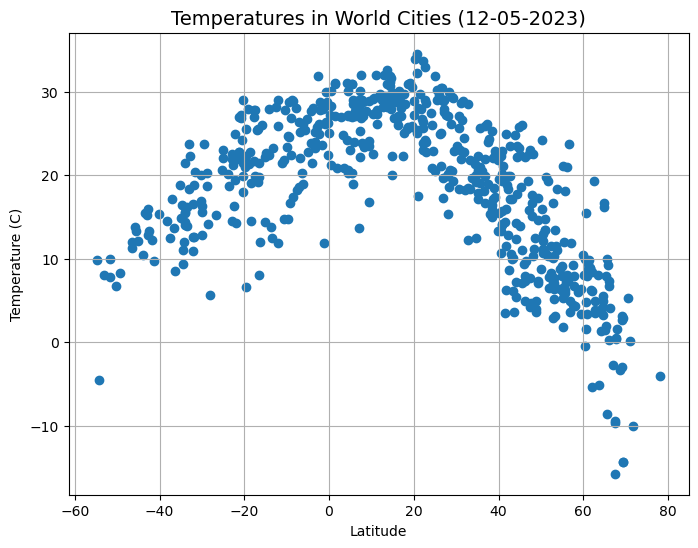

In [8]:
# Build scatter plot for latitude vs. temperature

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph properties
plt.title(f"Temperatures in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1_Lat_Temp.png")

# Show plot
plt.show()


#### Latitude vs. Humidity

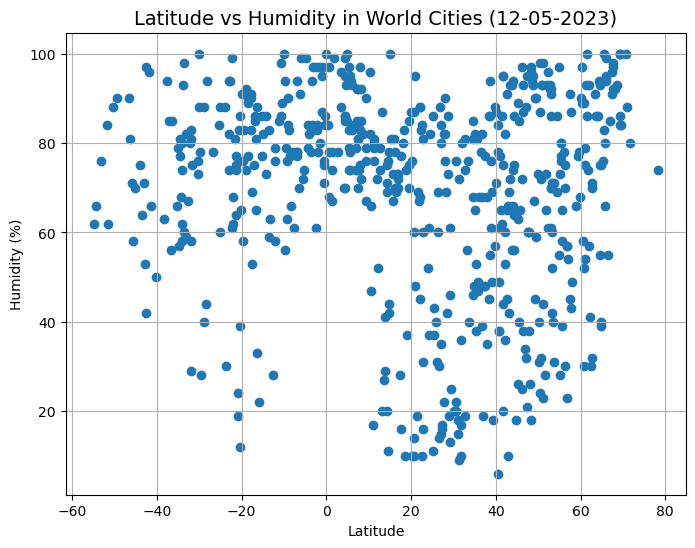

In [9]:
# Build the scatter plots for latitude vs. humidity

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph properties
plt.title(f"Latitude vs Humidity in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2_Lat_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness

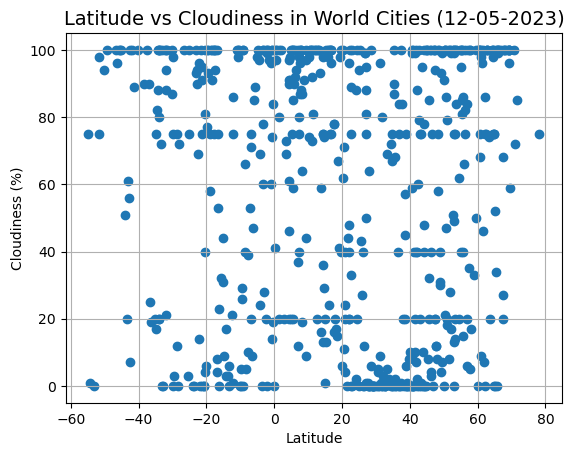

In [10]:
# Build the scatter plots for latitude vs. cloudiness

# create the scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph prop% erties
plt.title(f"Latitude vs Cloudiness in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3_Lat_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed

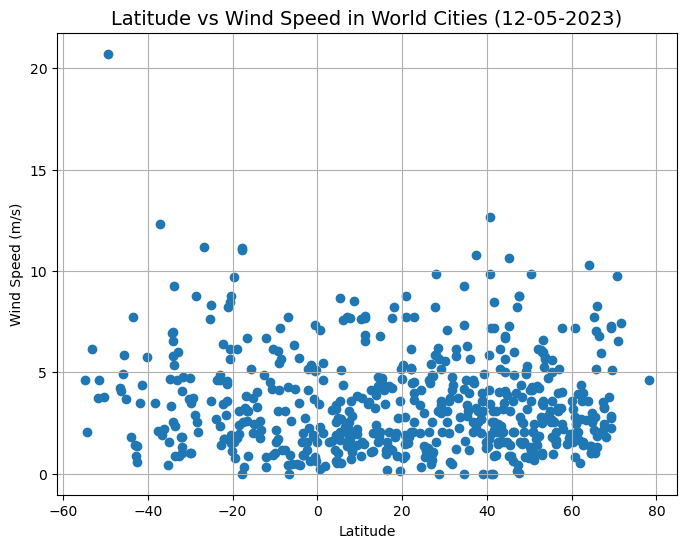

In [11]:
# Build the scatter plots for latitude vs. wind speed

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# get the most recent date for the title
# convert it from Unix format for display

map_date = city_data_df["Date"].max()

map_datetime_obj=datetime.utcfromtimestamp(map_date)
map_date_string=map_datetime_obj.strftime("%d-%m-%Y")

# Include the other requested graph properties
plt.title(f"Latitude vs Wind Speed in World Cities ({map_date_string})", fontsize=14)
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4_Lat_windspeed.png")

# Show plot
plt.show()

---

## Compute Linear Regression for Each Relationship


In [12]:
# Define a function to calculate linear regression values and the 
# equation for the linear regression line.  The rvalue used is the 
# Pearson's r, which varies from -1 >= r <= 1.

def getLinRegress(x_values, y_values):
    
    # Get regression values
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept

    # Get line equatlion for plotting.  Formatting at two decimal
    # positions looks better for display on the map, but may lead  
    # to the slope appearing to be zero when it is not zero at 
    # the third decimal position, as occurred in some datasets.
    
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    # print(line_eq)
                  
    return regress_values, line_eq, rvalue


In [13]:
# Define a fucntion to plot a scatter plot with a linear regression line and equation.
# Input parmeters are the x and y values to plot, the title of the map,
# the labels for the x and y axes, the corridinates to start plotting the
# linear regression line, and the name of the image file to be saved. If
# the image file exists, it will be overwritten, if not it will be created.

def plotRegress(x_values, y_values, map_title, x_labls, y_labls, eq_x, eq_y, img_name):
    
    regress_vals, regress_eq, rval = getLinRegress(x_values, y_values)
    
    print(f"The r value is: {rval}")

    #Set the plot size
    plt.figure(figsize=(8, 6))

    # create the scatter plot
    plt.scatter(x_values, y_values, marker="o")

    # plot the regression line
    plt.plot(x_values, regress_vals, "r-")

    # Set the other plot properties

    plt.title(map_title, fontsize=14)
    plt.xlabel(x_labls)
    plt.ylabel(y_labls)
    plt.grid(True)

    # display the equation for the linear regression line
    plt.annotate(regress_eq, (eq_x, eq_y), fontsize=15, color="red")

    # Save the figure
    plt.savefig(f"output_data/{img_name}.png")

    # Show plot
    plt.show()


In [14]:
# Create a DataFrame with the northern hemisphere data (Latitude >= 0)

northern_cities_df = city_data_df[city_data_df["Lat"] >= 0]

# store northern hemisphere values to be used in multiple plots

northern_lats = northern_cities_df["Lat"]
northern_temps = northern_cities_df["Max Temp"]
northern_humidity = northern_cities_df["Humidity"]
northern_cloudiness = northern_cities_df["Cloudiness"]
northern_wind_speed = northern_cities_df["Wind Speed"]

# Display sample data
northern_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,thinadhoo,0.5333,72.9333,28.29,78,100,7.09,MV,1683856277
4,magalia,39.8121,-121.5783,21.86,57,8,1.26,US,1683856277
5,la ronge,55.1001,-105.2842,21.12,28,40,2.57,CA,1683856222
6,pacific grove,36.6177,-121.9166,18.08,78,40,4.63,US,1683856135
7,reggane,26.7158,0.1714,30.41,14,99,5.40,DZ,1683856278


In [15]:
# Create a DataFrame with the southern hemisphere data (Latitude < 0)

southern_cities_df = city_data_df[city_data_df["Lat"] < 0]

# store values to be used in multiple plots of southern hemisphere data

southern_lats = southern_cities_df["Lat"]
southern_temps = southern_cities_df["Max Temp"]
southern_humidity = southern_cities_df["Humidity"]
southern_cloudiness = southern_cities_df["Cloudiness"]
southern_wind_speed = southern_cities_df["Wind Speed"]

# Display sample data

southern_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,11.08,81,82,3.32,ZA,1683856206
2,alice springs,-23.7000,133.8833,18.75,30,0,4.63,AU,1683856196
3,puerto natales,-51.7236,-72.4875,7.80,84,98,3.73,CL,1683856027
8,itamaraca,-7.7478,-34.8256,28.03,78,39,3.11,BR,1683856278
9,grytviken,-54.2811,-36.5092,-4.49,66,1,2.07,GS,1683856151


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8309352174185987


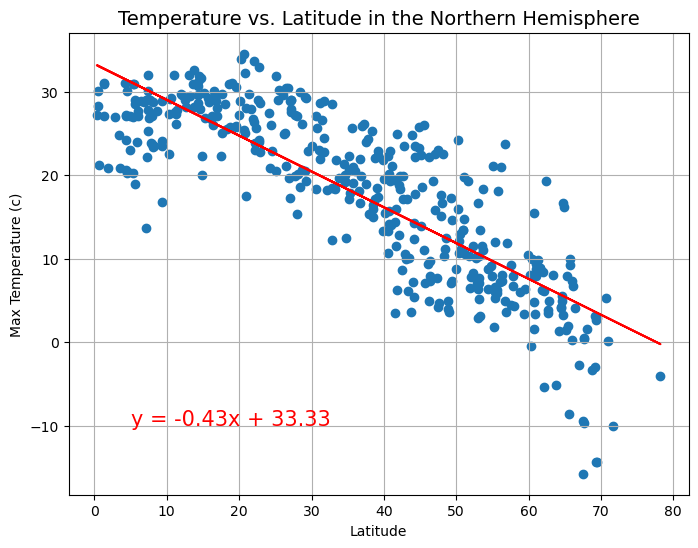

In [16]:
# Calc linear regression for Northern Hemisphere temperature and latitude
# and draw a scatter plot by calling the plotting function, which itself
# calls the linRegress function. The parameters are the x and y data to plot,
# the title of the plot and its x and y labels, the coordinates of 
# where to begin plotting the linear regression equation, and the name of the
# file where the plot image will be stored.

plotRegress(northern_lats, northern_temps, 
            "Temperature vs. Latitude in the Northern Hemisphere", 
            "Latitude", "Max Temperature (c)", 5, -10, "northern_lat_temp")


The r value is: 0.7156169602311475


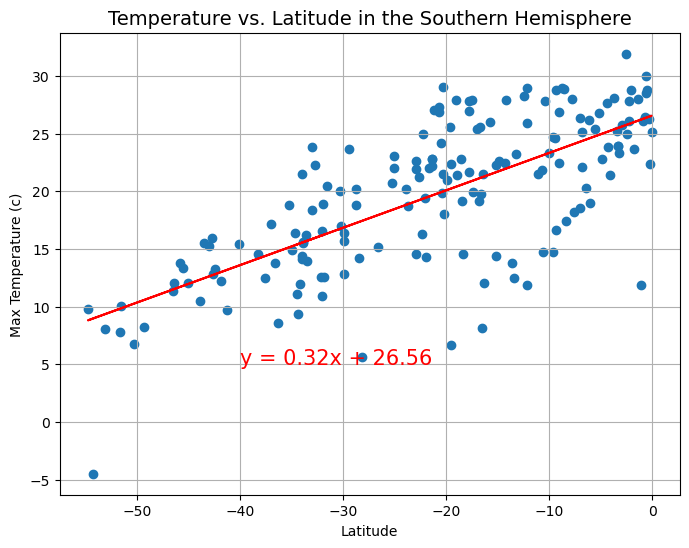

In [17]:
# Calc linear regression for Southern Hemisphere temperature and latitude
# and draw a scatter plot by calling the regression plotting function, which itself
# calls the linRegress function. The parameters are the x and y data to plot,
# the title of the plot and its x and y labels, the coordinates of 
# where to begin plotting the linear regression equation, and the name of the
# file where the plot image will be stored.

plotRegress(southern_lats, southern_temps, 
            "Temperature vs. Latitude in the Southern Hemisphere", 
            "Latitude", "Max Temperature (c)", -40, 5, "southern_lat_temp")

### Observations about the linear relationship between latitude and temperature:

In the northern hempisphere, temperature and latitude are strongly negatively correlated.  That is, tempertures increase as the latitude decreases towards zeros.  In the southern hemisphere, temperature and latitute are strongly positively correlated.  In other words, temperatures increase as the latitude increases towards zero.  In both cases, in over 40 samples, the r values are always over 0.7, and often much higher, around 0.82 to 0.84.  The closer the r-values are to 1, the stronger the correlation,
with anything of at least 0.7 considered to be strongly correlated.

Overall, the two sets of linear regressions show that maximum temperatures are higher as one heads towards the equator, which has a latitutde of zero.  This seems intuitively obvious; the earth is not a perfect sphere and the circumference of the earth is largest at the equator.  The portion of the earth with the largest bulge towards the sun is overall hotter, and temperatures decrease as one moves toward the poles.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.036220353553543194


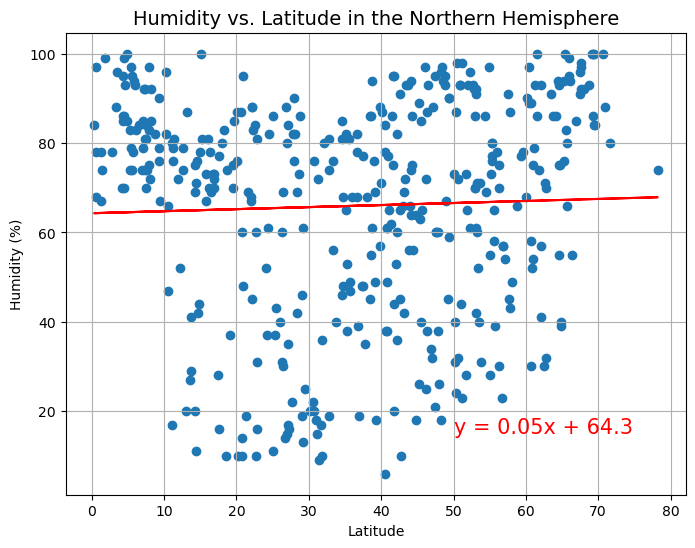

In [18]:
# Calc linear regression for Northern Hemisphere humidity and latitude
# and draw a scatter plot by calling the plotting function, which itself
# calls the linRegress function. The parameters are the x and y data to plot,
# the title of the plot and its x and y labels, the coordinates of 
# where to begin plotting the linear regression equation, and the name of the
# file where the plot image will be stored.


plotRegress(northern_lats, northern_humidity, 
            "Humidity vs. Latitude in the Northern Hemisphere", 
            "Latitude", "Humidity (%)", 50, 15, "northern_lat_humidity")


The r value is: 0.20073322717539593


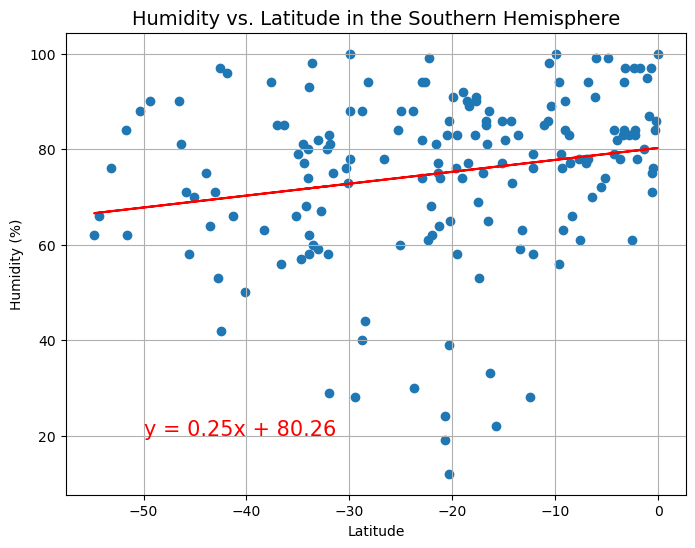

In [19]:
# Calc linear regression for Southern Hemisphere humidity vs latitude,
# and draw a scatter plot by calling the plotting function, which itself
# calls the linRegress function. The parameters are the x and y data to plot,
# the title of the plot and its x and y labels, the coordinates of 
# where to begin plotting the linear regression equation, and the name of the
# file where the plot image will be stored.

plotRegress(southern_lats, southern_humidity, 
            "Humidity vs. Latitude in the Southern Hemisphere", 
            "Latitude", "Humidity (%)", -50, 20, "southern_lat_humidity")


### Observations about the linear relationship between humidity and latitude

In both the northern and southern hemispheres, there is a very, very weak correlation between humidity and latitude.
The Pearson's r value is well below 0.3, (in more than 40 runs), and the linear regression line is almost flat.  If the value were 0, and the line was thus completely flat, there would be no correlation at all.  

Intuitively, this overall lack of correlation makes sense, as humidity is related to the presence of water, on a coastline or near a lake or river, the topography, and the types of flora and fauana in the area.  Higher elevations will tend to be more humid.  Prairie, desert, and savannah, which are drier, occur at all latitudes.   While highly hummid tropical rain forests occur largely in the northern part of the southern hemisphere, swamps exist along rivers in many latitudes in the northern hemisphere, not just in something like the Everglades.

In both hemispheres, there is a very, very weak positive correlation between increasing humidity and increasing latitude,
but, to the extent that there is any correlation, it is likely a result of changes in elevation and temperature.  To a small extent, these are associated with latitude.

The countries which surround the equator in Africa, Gabon, Kenya, Uganda, Somallia, Republic of the Congo, and Democratic Republic of the Congo, have a larger land mass than the portions of Ecador, Columbia, and Brazil, and the islands of Sao Tome and Principe, Kiribati, and Indonesia which are surround the equator.  While Kenya and Uganda have some forests, they also comprise a large amount of drier, flat savannahs as well as deserts, whereas the island nations and the portions of South America that lie near the equator are rain forest.   The tropical islands are largely at sea level or slighly above.

Thus, the latitudes near the equator show both extreme dryness and extreme humidity, depending on their elevation, their proximity to oceans or lakes, and the flora and fauna present.  Higher in the mountains, which are farther north in the northern hemisphere, may be associated with higher humidities, even if not to as great an extent as with a semi-tropical area such as Florida, but the largest relative area of land mass in the northern hemisphere is mountains, which get higher as one moves north, to things like the Alaskan ranges and the Himalayas.  

In the southern hemisphere, near the south pole, the temperatures are too cold to permit snow, and thus, while snow_covered, there is very little snow fall.   As one moves north toward the equator, and temperatures rise, the proportion of land covered in tropical rain forest, and both high (Amazons) and low (Indonesia) elevations, increases.   

Overall, the extremely weak positive correlation and very slightly rising slope of the linear regression line for both hemispheres fits with intuition about factors other than latitude that could impact humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.008124435872875407


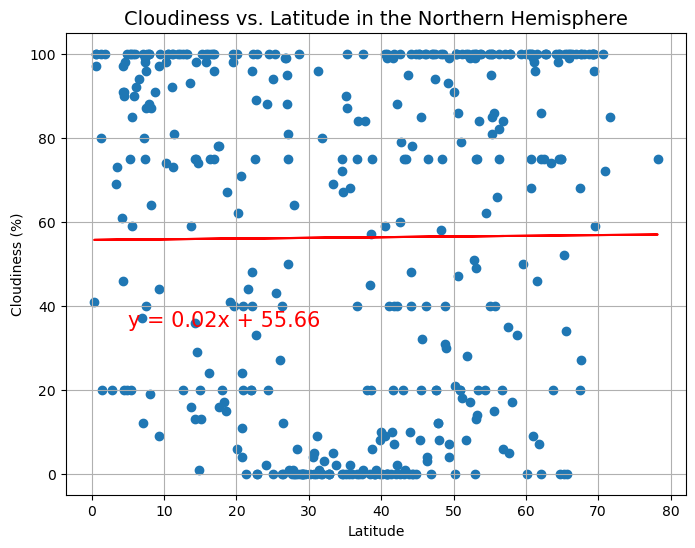

In [20]:
# Calc linear regression for Northern Hemisphere cloudiness vs. latitude,
# and draw a scatter plot by calling the plotting function, which itself
# calls the linRegress function. The parameters are the x and y data to plot,
# the title of the plot and its x and y labels, the coordinates of 
# where to begin plotting the linear regression equation, and the name of the
# file where the plot image will be stored.

plotRegress(northern_lats, northern_cloudiness, 
            "Cloudiness vs. Latitude in the Northern Hemisphere", 
            "Latitude", "Cloudiness (%)", 5, 35, "northern_lat_cloud")


The r value is: -0.10864558580872588


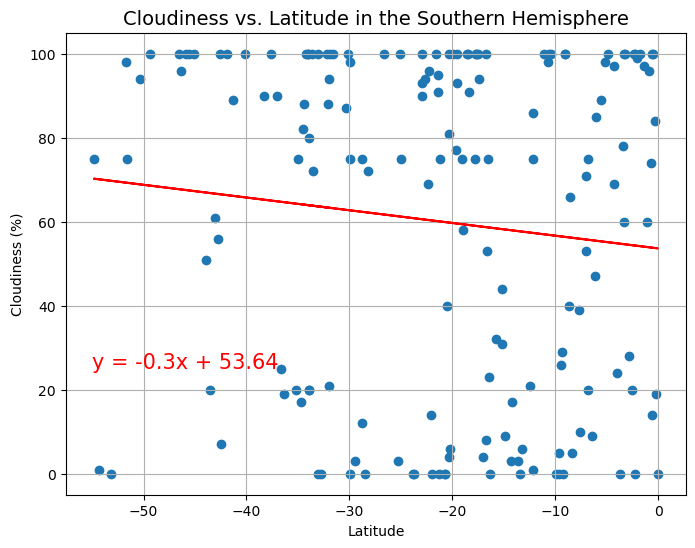

In [21]:
# Calc linear regression for cloudiness vs. latitude in the Southern Hemisphere,
# and draw a scatter plot by calling the plotting function, which itself
# calls the linRegress function. The parameters are the x and y data to plot,
# the title of the plot and its x and y labels, the coordinates of 
# where to begin plotting the linear regression equation, and the name of the
# file where the plot image will be stored.

plotRegress(southern_lats, southern_cloudiness, 
            "Cloudiness vs. Latitude in the Southern Hemisphere", 
            "Latitude", "Cloudiness (%)", -55, 25, "southern_lat_cloud")


#### Observations about the linear relationship between cloudiness and latitude

There is very, very little correlation between cloudiness and latitude.  The Pearson's r values are less than .1 for both hemispheres, for approximately 40 runs, and the linear regression lines are almost flat.  The lines show a very slight positive correlation in the northern hemisphere, and a very slight negative correlation in the southern hemisphere.  Statistically, this would be viewed as not correlated.  This is inherently logical, as cloudiness, like humidity, is much more likely tied to elevation, water bodies, and the regional flora than to latitude, and particularly to elevation.

A linear regression model may not be the best fit for the cloudiness data, as the data sets show that there are many points of 100% humidity and many points of 0% humidity.  These are likely related to areas of steep mountains and deserts.

With the r-values being so small, and the correlation so weak, the difference in sample sizes may play a much bigger role.  For one run, for instance, there were 434 cities in the northern hemisphere and 166 in the southern, so each individual city had a much larger impact on the whole.

The r value of 0.03 in one run of the southern hemisphere was slightly higher than the r value of 0.008 in the northern hemisphere, and the plots consistently show a very, very weak oositive correlation between cloudiness and latitude in the northern hemishere and a very, very weak negaive correlation between cloudiness and latitude in the southern hemisphere.

Large deserts in the northern hemisphere, such as the Sahara, and the Saudi Desert, have smaller latitudes closer to the equator, and no clouds, while some places at higher elevations in the nine mountain ranges in Alaska, such as Juneau, at much larger latitudes, are listed as 100% cloudy.  In general, the highest elevations in the northern hemisphere are farther from the equator, so lower cloudiness and latitude decreases would be expected.  This would accord with a slight positive correlation in cloudiness and latitude in the northern hemisphere, which is not what is observed, but that might be offset by lower cloudiness in the Gobi Desert and in other parts of Central Asia.

In addition to the absence of snow at the south pole, the largest land mass in the southern part of the southern hemisphere is Australia, which is largely desert, wut some forest along the coast, and not offset by the 100% cloudiness in forests at certain points in New Zealand.  As one heads further north towards the equator (as latitudes increase), the areas of tropical rain forest increase, including the vast rain forest covering mountains in the Amazon in Brazil, where some parts are 100% cloudy at all times.  This would accord with a slight positive correlation in cloudiness and and latitude in the southern hemisphere.

While the very, very weak correlation could be explained this way, the data sample is very small with respect to the total area being examined, and is not evenly divided between the northern and southern hemispheres, so slight differences may not be representative.  It is also not fully representative of the land masses themselves, as people will choose to locate cities near water, and where they can build houses, and not in the middle of rain forests or deserts.  

In addition, as is most evident in the wind plots or when all of the cities are plotted on a global map, as in Part 2, taking random number pairs to get cities near them is not guaranteed to produce a set of random cities equally distributed globally.  Further, there are fewer large cities in the southern hemisphere than in the northern.  There are also more areas of unbuilt land relative to built areas in the southern hemisphere.  At the same time, this data is returning Yellow Knife, for example, a very small town, as a city, so what is being compared is not precisely the same type of entity.  

It is not clear whether the differences in numbers of cities in this data set between northern and southern hemispheres, at a greater than two-to-one ratio, are due to the fact that there are fewer cities in the southern hemisphere, or due to issues with how the random cities were generated.

To get a better random selection of cities from all parts of the world, one could try to get separate groups of cities from the northern and southern hemispheres, with the numbers for each group set proportionally to the overall proportion of cities in those two hemispheres.  This could be further refined to try to collect cities for each continent (except Antarctica), again proportionally to the number of cities on that continent relative to the overall number of cities in the world.   

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.06373772425275015


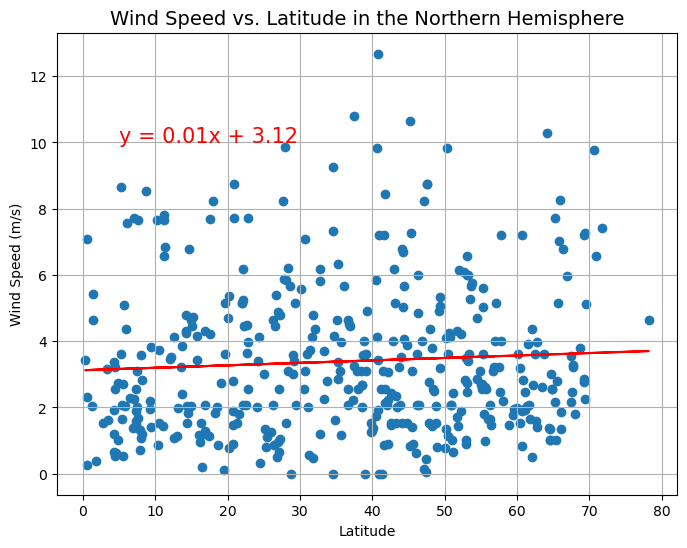

In [22]:
# Northern Hemisphere:   Wind Speed and Latitude

# Calc linear regression for northern hemisphere windspeed and latitude
# and draw a scatter plot by calling the plotting function, which itself
# calls the linRegress function. The parameters are the x and y data to plot,
# the title of the plot and its x and y labels, the coordinates of 
# where to begin plotting the linear regression equation, and the name of the
# file where the plot image will be stored.

plotRegress(northern_lats, northern_wind_speed, 
            "Wind Speed vs. Latitude in the Northern Hemisphere", 
            "Latitude", "Wind Speed (m/s)", 5, 10, "northern_lat_wind")



The r value is: -0.20559850409414174


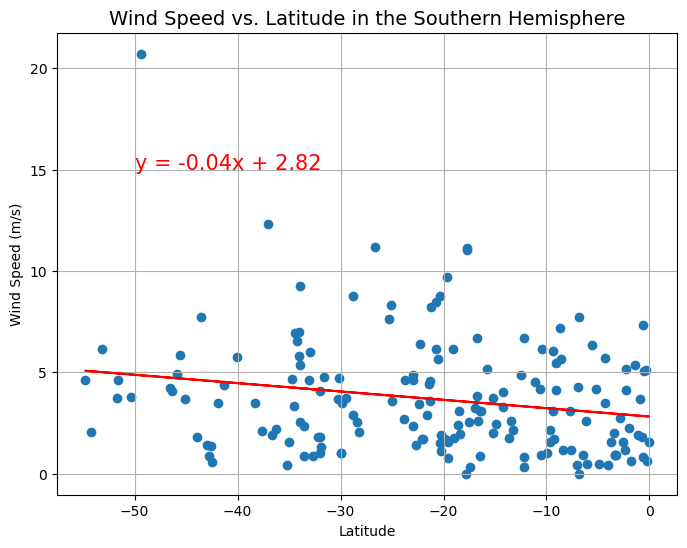

In [23]:
# Southern Hemisphere:  Wind Speed and Latitude

# Calc linear regression for southern hemisphere windspeed vs latitude,
# and draw a scatter plot by calling the plotting function, which itself
# calls the linRegress function. The parameters are the x and y data to plot,
# the title of the plot and its x and y labels, the coordinates of 
# where to begin plotting the linear regression equation, and the name of the
# file where the plot image will be stored.

plotRegress(southern_lats, southern_wind_speed, 
            "Wind Speed vs. Latitude in the Southern Hemisphere", 
            "Latitude", "Wind Speed (m/s)", -50, 15, "southern_lat_wind")


#### Observations about the linear relationship between wind speed and latitude

As with cloudiness, there is very little correlation between wind speed and latitude in either hemisphere.  The Person's r value is less than approximately 0.1, which indicates an extremely weak correlation, and the regression line is almost flat.  This makes sense, as wind speed is partly related to ocean currents and wind coming across oceans or vast open plains or deserts.   The regression line in the northern hemisphere is almost completely flat, with a very minute positive correlation, whereas in the southern hemisphere there appears to be a very, very weak negative correlation between wind speed and latitude for southern hemisphere cities.

In the northern hemisphere, there is in general a more even distribution of wind speeds, from 0 to approximately 11 m/s, across all latitudes, with more cities in locations below 4 m/s, but many above that at all latitudes, and a small set at slightly above 10.  There was also one city that appears to be at close to 12 in one run.  This might be accurate, or might be an outlier.  Because it is not too far off from the group between 10 and 11, it is more likely accurate.

In the southern hemisphere, more cities appear to be located at places with wind speed below 5 m/s, especially at the lowest latitudes, with a smaller group between 5 m/s and 7 m/s, and a few close to 10.  There appear to be fewer in the 8 to 10 range, and fewer in the over 10 range, than in the northern hemisphere.  The prevailing winds over the vast open spaces of Australia might account for this in part, with more mountains and forests in northern South America resulting in lower wind speeds as latitudes increase towards zero.

This data also might have inaccurate outliers at the high end.  One run, for example, showed a single city having a wind speed of over 19 m/s, almost double any other.  There might be a problem with this data point and it might be skewing the analysis.   With the smaller overall number of cities in the southern hemisphere dataset, that one outlier, accurate or not, will weigh even more heavily. 

It makes sense that fewer cities in the lower latitudes in the southern hemisphere (latitudes south of -40), would be located in areas with high wind speeds, because the combination of high wind and extreme cold likely would be inconducive to humans living there.  